<a href="https://colab.research.google.com/github/ricky-kiva/dl-deep-tf-cnn/blob/main/4_l1_multiclass_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiclass Classifier**

Download dataset: [Rock-Paper-Scissors dataset](https://www.tensorflow.org/datasets/catalog/rock_paper_scissors)

In [1]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip

# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2023-09-24 17:36:42--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.171.207, 108.177.112.207, 142.250.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.171.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M   201MB/s    in 1.0s    

2023-09-24 17:36:43 (201 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2023-09-24 17:36:43--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.171.207, 108.177.112.207, 142.250.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.171.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-

Unzip dataset

In [2]:
import zipfile

# extract train set
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

# extract test set
local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='./rps-test-set.zip' mode='r'>>

Referencing directories

In [3]:
import os

base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock02-034.png', 'rock06ck02-007.png', 'rock05ck01-084.png', 'rock03-113.png', 'rock03-055.png', 'rock03-085.png', 'rock07-k03-001.png', 'rock01-076.png', 'rock04-100.png', 'rock06ck02-064.png']
['paper04-060.png', 'paper01-035.png', 'paper07-083.png', 'paper02-101.png', 'paper06-097.png', 'paper02-102.png', 'paper02-070.png', 'paper06-031.png', 'paper01-082.png', 'paper07-057.png']
['scissors01-053.png', 'testscissors03-024.png', 'scissors04-052.png', 'testscissors02-052.png', 'scissors02-107.png', 'testscissors03-091.png', 'testscissors02-017.png', 'scissors02-116.png', 'testscissors03-118.png', 'testscissors02-024.png']


Data exploration: inspect some images

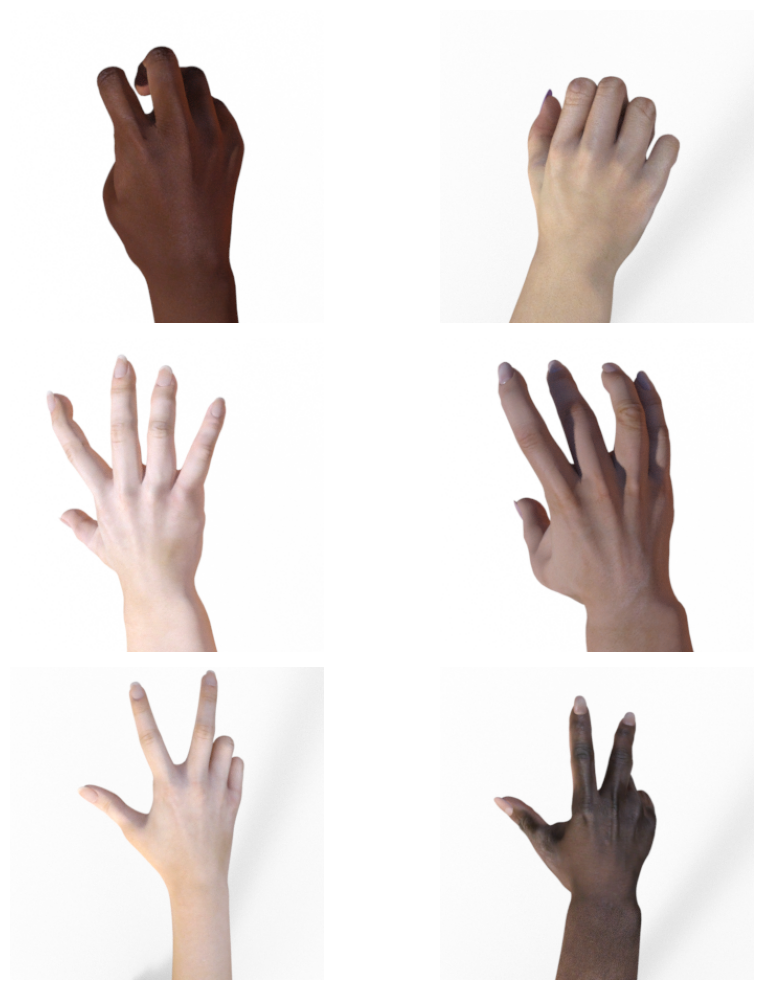

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for
             fname in rock_files[pic_index-2:pic_index]]

next_paper = [os.path.join(paper_dir, fname) for
              fname in paper_files[pic_index-2:pic_index]]

next_scissors = [os.path.join(scissors_dir, fname) for
                 fname in scissors_files[pic_index-2:pic_index]]

fig, axes = plt.subplots(3, 2, figsize=(10, 10))

for i, img_path in enumerate(next_rock[:2] + next_paper[:2] + next_scissors[:2]):
    row = i // 2
    col = i % 2

    img = mpimg.imread(img_path)
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

Build the model

In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') # will result to probability of each class
])

model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7d8b5f953ac0>>

Set training parameters

In [6]:
model.compile(loss='categorical_crossentropy', # loss for multiclass cases
              optimizer='rmsprop',
              metrics=['accuracy'])

Prepare ImageDataGenerator

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = 'tmp/rps-train/rps'
VALIDATION_DIR = "tmp/rps-test/rps-test-set"

training_datagen = ImageDataGenerator(rescale=1./255.,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                       target_size=(150, 150),
                                                       class_mode='categorical',
                                                       batch_size=126)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              target_size=(150, 150),
                                                              class_mode='categorical',
                                                              batch_size=126)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


Train the model

In [8]:
history = model.fit(train_generator,
                    epochs=25,
                    steps_per_epoch=20,
                    validation_data=validation_generator,
                    verbose=1,
                    validation_steps=3)

Epoch 1/25
20/20 [==============================] - 38s 1s/step - loss: 1.2408 - accuracy: 0.3774 - val_loss: 1.0909 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 23s 1s/step - loss: 1.1132 - accuracy: 0.3909 - val_loss: 1.1270 - val_accuracy: 0.3333
Epoch 3/25
20/20 [==============================] - 23s 1s/step - loss: 1.0688 - accuracy: 0.4302 - val_loss: 1.1175 - val_accuracy: 0.3495
Epoch 4/25
20/20 [==============================] - 23s 1s/step - loss: 1.0652 - accuracy: 0.4357 - val_loss: 0.8985 - val_accuracy: 0.6478
Epoch 5/25
20/20 [==============================] - 23s 1s/step - loss: 0.9873 - accuracy: 0.4940 - val_loss: 0.6297 - val_accuracy: 0.6559
Epoch 6/25
20/20 [==============================] - 23s 1s/step - loss: 0.8772 - accuracy: 0.5810 - val_loss: 1.2303 - val_accuracy: 0.3952
Epoch 7/25
20/20 [==============================] - 22s 1s/step - loss: 0.8367 - accuracy: 0.5964 - val_loss: 0.3173 - val_accuracy: 0.9597
Epoch 8/25
20/20 [==

Evaluate the model

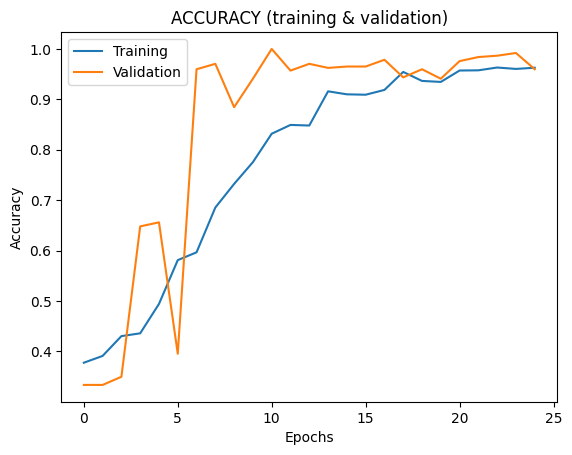

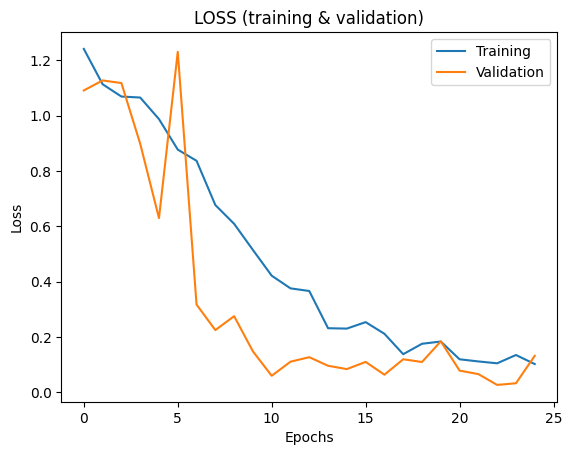

In [9]:
import matplotlib.pyplot as plt

# get data from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# get epochs data
epochs = range(len(acc))

# plot accuracy data
plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.title('ACCURACY (training & validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# plot loss data
plt.figure()
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.title('LOSS (training & validation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# **Model Prediction**

Model prediction

In [16]:
import numpy as np
from google.colab import files

from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving d282df11-214e-4d24-9f5f-f3fc60e5ec30.png to d282df11-214e-4d24-9f5f-f3fc60e5ec30.png
1/1 [==============================] - 0s 22ms/step
d282df11-214e-4d24-9f5f-f3fc60e5ec30.png
[[0. 1. 0.]]


Model prediction if you are using old version of Safari:

1. Select the `folder` icon on the left `menu bar`.
2. Click on the `folder with an arrow pointing upwards` named `..`
3. Click on the `folder` named `tmp`.
4. Inside of the `tmp` folder, `create a new folder` called `images`. You'll see the `New folder` option by clicking the `3 vertical dots` menu button next to the `tmp` folder.
5. Inside of the new `images` folder, upload an image(s) of your choice. Drag and drop the images(s) on top of the `images` folder.
6. Uncomment and run the code block below.

In [ ]:
# # CODE BLOCK FOR OLDER VERSIONS OF SAFARI

# import os
# import numpy as np
# from tensorflow.keras.utils import load_img, img_to_array

# images = os.listdir("/tmp/images")

# print(images)

# for i in images:
#     print()
#     # predicting images
#     path = '/tmp/images/' + i
#     img = load_img(path, target_size=(150, 150))
#     x = img_to_array(img)
#     x = np.expand_dims(x, axis=0)

#     images = np.vstack([x])
#     classes = model.predict(images, batch_size=10)
#     print(path)
#     print(classes)